## Import Packages

In [249]:
import pandas as pd
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import os
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

## Read data

In [250]:
os.getcwd()

'C:\\Users\\Lars\\Documents\\Git\\forecast5.0\\Learning'

In [253]:
# get data from google drive
lenzerheide_file = tf.keras.utils.get_file('data_lenzerheide_w_season.csv', 'https://docs.google.com/spreadsheets/d/1cFjr92P5wtk1wepvWG4DLtw_fvb0WQSUdOXe6HrzmRQ/gviz/tq?tqx=out:csv&sheet=input+dataset_lenzerheide')

 376832/Unknown - 0s 0us/step

## Clean Data

In [258]:
df_1 = pd.read_csv(lenzerheide_file)
df_1 # inspect data

,Datum,Wochentag,season,isFerienZH,Ferien Desc ZH,isFerienSG,Ferien Desc SG,isFerienGR,Ferien Desc GR,Feiertag Desc,...,is_fog_1h_idx_max,precip_1h_mm_sum,fresh_snow_1h_cm_sum,wind_speed_mean_10m_1h_ms_avg,weather_symbol_1h_idx_spe,number_of_events,Schalter,Tel,Mail,Total Anfragen
0,01.01.2016,Freitag,winter season,0,NaN,0,NaN,0,NaN,Neujahr,...,0.0,0.00,0.0,3.8,1.7,0,23.0,65.0,10.0,98.0
1,02.01.2016,Samstag,winter season,0,NaN,0,NaN,0,NaN,Berchtoldstag,...,1.0,1.70,2.1,3.6,0.0,0,72.0,65.0,18.0,155.0
2,03.01.2016,Sonntag,winter season,0,NaN,0,NaN,0,NaN,NaN,...,1.0,0.57,0.5,4.2,0.0,0,38.0,65.0,25.0,128.0
3,04.01.2016,Montag,winter season,0,NaN,0,NaN,0,NaN,NaN,...,0.0,0.08,0.0,8.9,0.0,0,65.0,65.0,50.0,180.0
4,05.01.2016,Dienstag,winter season,0,NaN,0,NaN,0,NaN,NaN,...,0.0,0.00,0.0,5.9,1.1,0,31.0,65.0,40.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,27.12.2020,Sonntag,winter season,1,NaN,1,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1823,28.12.2020,Montag,winter season,1,NaN,1,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1824,29.12.2020,Dienstag,winter season,1,NaN,1,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1825,30.12.2020,Mittwoch,winter season,1,NaN,1,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [259]:
# description for the dataset
print(df_1.describe())

        isFerienZH   isFerienSG   isFerienGR  isFeiertag ZH  isFeiertag SG  \
count  1827.000000  1827.000000  1827.000000    1827.000000    1827.000000   
mean      0.379858     0.374932     0.393541       0.078818       0.073344   
std       0.485484     0.484238     0.488669       0.269528       0.260772   
min       0.000000     0.000000     0.000000       0.000000       0.000000   
25%       0.000000     0.000000     0.000000       0.000000       0.000000   
50%       0.000000     0.000000     0.000000       0.000000       0.000000   
75%       1.000000     1.000000     1.000000       0.000000       0.000000   
max       1.000000     1.000000     1.000000       1.000000       1.000000   

       isFeiertag GR   t_2m_c_avg  snow_depth_cm_avg  visibility_m_avg  \
count    1827.000000  1393.000000        1393.000000       1393.000000   
mean        0.089765     6.016389          23.745836      25810.177207   
std         0.285923     7.219762          32.987484       4575.828243   
m

### Missing Values

In [260]:
df_1.isna().sum()

Datum                                0
Wochentag                            0
season                               0
isFerienZH                           0
Ferien Desc ZH                    1423
isFerienSG                           0
Ferien Desc SG                    1426
isFerienGR                           0
Ferien Desc GR                    1387
Feiertag Desc                     1628
isFeiertag ZH                        0
isFeiertag SG                        0
isFeiertag GR                        0
t_2m_c_avg                         434
snow_depth_cm_avg                  434
visibility_m_avg                   434
wind_speed_10m_ms_max              434
prob_precip_1h_p_avg               434
prob_tstorm_1h_p_avg               434
hail_idx_avg                       434
wind_gusts_10m_ms_max              434
wind_speed_mean_10m_24h_ms_avg     434
t_max_2m_24h_c_max                 434
t_min_2m_24h_c_min                 434
precip_24h_mm_max                  434
fresh_snow_24h_cm_max    

In [261]:
# only keep observations that are not NA
df_1 = df_1.loc[df_1['Total Anfragen'].notna()]

In [262]:
# only keep observations that are not zero for 'Total Anfragen'
df_1 = df_1.loc[df_1['Total Anfragen'] != 0]

In [263]:
# inspect remaining NA values
df_1.isna().sum()

Datum                               0
Wochentag                           0
season                              0
isFerienZH                          0
Ferien Desc ZH                    782
isFerienSG                          0
Ferien Desc SG                    787
isFerienGR                          0
Ferien Desc GR                    756
Feiertag Desc                     895
isFeiertag ZH                       0
isFeiertag SG                       0
isFeiertag GR                       0
t_2m_c_avg                          0
snow_depth_cm_avg                   0
visibility_m_avg                    0
wind_speed_10m_ms_max               0
prob_precip_1h_p_avg                0
prob_tstorm_1h_p_avg                0
hail_idx_avg                        0
wind_gusts_10m_ms_max               0
wind_speed_mean_10m_24h_ms_avg      0
t_max_2m_24h_c_max                  0
t_min_2m_24h_c_min                  0
precip_24h_mm_max                   0
fresh_snow_24h_cm_max               0
is_sleet_1h_

In [264]:
df_1

,Datum,Wochentag,season,isFerienZH,Ferien Desc ZH,isFerienSG,Ferien Desc SG,isFerienGR,Ferien Desc GR,Feiertag Desc,...,is_fog_1h_idx_max,precip_1h_mm_sum,fresh_snow_1h_cm_sum,wind_speed_mean_10m_1h_ms_avg,weather_symbol_1h_idx_spe,number_of_events,Schalter,Tel,Mail,Total Anfragen
0,01.01.2016,Freitag,winter season,0,NaN,0,NaN,0,NaN,Neujahr,...,0.0,0.00,0.0,3.8,1.7,0,23.0,65.0,10.0,98.0
1,02.01.2016,Samstag,winter season,0,NaN,0,NaN,0,NaN,Berchtoldstag,...,1.0,1.70,2.1,3.6,0.0,0,72.0,65.0,18.0,155.0
2,03.01.2016,Sonntag,winter season,0,NaN,0,NaN,0,NaN,NaN,...,1.0,0.57,0.5,4.2,0.0,0,38.0,65.0,25.0,128.0
3,04.01.2016,Montag,winter season,0,NaN,0,NaN,0,NaN,NaN,...,0.0,0.08,0.0,8.9,0.0,0,65.0,65.0,50.0,180.0
4,05.01.2016,Dienstag,winter season,0,NaN,0,NaN,0,NaN,NaN,...,0.0,0.00,0.0,5.9,1.1,0,31.0,65.0,40.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,26.09.2019,Donnerstag,summer season,0,NaN,0,NaN,0,NaN,NaN,...,0.0,0.03,0.0,8.1,0.0,0,15.0,NaN,10.0,25.0
1365,27.09.2019,Freitag,summer season,0,NaN,0,NaN,0,NaN,NaN,...,0.0,0.00,0.0,6.0,0.7,0,21.0,NaN,10.0,31.0
1366,28.09.2019,Samstag,summer season,0,NaN,0,NaN,0,NaN,NaN,...,0.0,0.00,0.0,14.2,0.4,0,52.0,NaN,6.0,58.0
1367,29.09.2019,Sonntag,summer season,0,NaN,1,Herbstferien,0,NaN,NaN,...,0.0,0.00,0.0,9.9,1.4,0,0.0,NaN,7.0,7.0


In [265]:
# inpute missing values
df_1['Ferien Desc ZH'].fillna(value=0, inplace = True) # inplace=True overwrite existing value
df_1['Ferien Desc ZH']

0       0
1       0
2       0
3       0
4       0
       ..
1364    0
1365    0
1366    0
1367    0
1368    0
Name: Ferien Desc ZH, Length: 1004, dtype: object

In [266]:
# inpute missing values
df_1['Ferien Desc GR'].fillna(value=0, inplace = True) # inplace=True overwrite existing value
df_1['Ferien Desc GR']

0       0
1       0
2       0
3       0
4       0
       ..
1364    0
1365    0
1366    0
1367    0
1368    0
Name: Ferien Desc GR, Length: 1004, dtype: object

In [267]:
# inpute missing values
df_1['Ferien Desc SG'].fillna(value=0, inplace = True) # inplace=True overwrite existing value
df_1['Ferien Desc SG']

0                  0
1                  0
2                  0
3                  0
4                  0
            ...     
1364               0
1365               0
1366               0
1367    Herbstferien
1368    Herbstferien
Name: Ferien Desc SG, Length: 1004, dtype: object

In [268]:
# inpute missing values
df_1['Feiertag Desc'].fillna(value=0, inplace = True) # inplace=True overwrite existing value
df_1['Feiertag Desc']

0             Neujahr
1       Berchtoldstag
2                   0
3                   0
4                   0
            ...      
1364                0
1365                0
1366                0
1367                0
1368                0
Name: Feiertag Desc, Length: 1004, dtype: object

In [269]:
# input value = 26: Missing values are from September 2019
# values in Sept 2017: 24.2, values in Sept 2018: 27.8
df_1['Tel'].fillna(value=26, inplace = True) # inplace=True overwrite existing value
df_1['Tel']

0       65.0
1       65.0
2       65.0
3       65.0
4       65.0
        ... 
1364    26.0
1365    26.0
1366    26.0
1367    26.0
1368    26.0
Name: Tel, Length: 1004, dtype: float64

In [270]:
df_1

,Datum,Wochentag,season,isFerienZH,Ferien Desc ZH,isFerienSG,Ferien Desc SG,isFerienGR,Ferien Desc GR,Feiertag Desc,...,is_fog_1h_idx_max,precip_1h_mm_sum,fresh_snow_1h_cm_sum,wind_speed_mean_10m_1h_ms_avg,weather_symbol_1h_idx_spe,number_of_events,Schalter,Tel,Mail,Total Anfragen
0,01.01.2016,Freitag,winter season,0,0,0,0,0,0,Neujahr,...,0.0,0.00,0.0,3.8,1.7,0,23.0,65.0,10.0,98.0
1,02.01.2016,Samstag,winter season,0,0,0,0,0,0,Berchtoldstag,...,1.0,1.70,2.1,3.6,0.0,0,72.0,65.0,18.0,155.0
2,03.01.2016,Sonntag,winter season,0,0,0,0,0,0,0,...,1.0,0.57,0.5,4.2,0.0,0,38.0,65.0,25.0,128.0
3,04.01.2016,Montag,winter season,0,0,0,0,0,0,0,...,0.0,0.08,0.0,8.9,0.0,0,65.0,65.0,50.0,180.0
4,05.01.2016,Dienstag,winter season,0,0,0,0,0,0,0,...,0.0,0.00,0.0,5.9,1.1,0,31.0,65.0,40.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,26.09.2019,Donnerstag,summer season,0,0,0,0,0,0,0,...,0.0,0.03,0.0,8.1,0.0,0,15.0,26.0,10.0,25.0
1365,27.09.2019,Freitag,summer season,0,0,0,0,0,0,0,...,0.0,0.00,0.0,6.0,0.7,0,21.0,26.0,10.0,31.0
1366,28.09.2019,Samstag,summer season,0,0,0,0,0,0,0,...,0.0,0.00,0.0,14.2,0.4,0,52.0,26.0,6.0,58.0
1367,29.09.2019,Sonntag,summer season,0,0,1,Herbstferien,0,0,0,...,0.0,0.00,0.0,9.9,1.4,0,0.0,26.0,7.0,7.0


In [271]:
# check again for missing values
df_1.isnull().sum()

Datum                             0
Wochentag                         0
season                            0
isFerienZH                        0
Ferien Desc ZH                    0
isFerienSG                        0
Ferien Desc SG                    0
isFerienGR                        0
Ferien Desc GR                    0
Feiertag Desc                     0
isFeiertag ZH                     0
isFeiertag SG                     0
isFeiertag GR                     0
t_2m_c_avg                        0
snow_depth_cm_avg                 0
visibility_m_avg                  0
wind_speed_10m_ms_max             0
prob_precip_1h_p_avg              0
prob_tstorm_1h_p_avg              0
hail_idx_avg                      0
wind_gusts_10m_ms_max             0
wind_speed_mean_10m_24h_ms_avg    0
t_max_2m_24h_c_max                0
t_min_2m_24h_c_min                0
precip_24h_mm_max                 0
fresh_snow_24h_cm_max             0
is_sleet_1h_idx_max               0
is_fog_1h_idx_max           

## Data Exploration

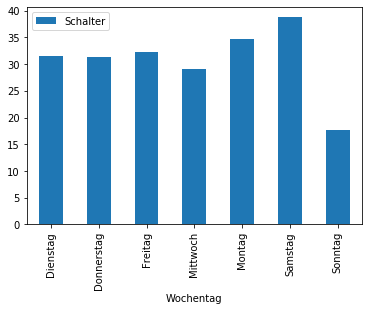

In [272]:
# Average Front Desk Visits per Weekday
df_1[['Wochentag','Schalter']].groupby('Wochentag').mean().plot(kind='bar')

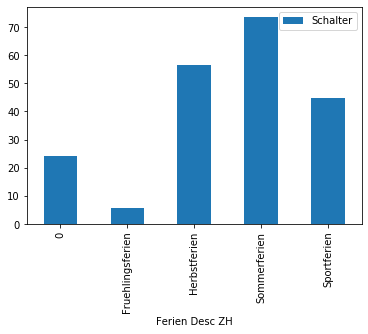

In [273]:
# Average Front Desk Visits per Holiday Season ZH
df_1[['Ferien Desc ZH','Schalter']].groupby('Ferien Desc ZH').mean().plot(kind='bar')

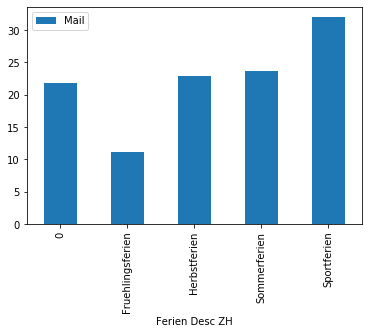

In [274]:
# Average Number of Emails per Holiday Season ZH
df_1[['Ferien Desc ZH','Mail']].groupby('Ferien Desc ZH').mean().plot(kind='bar')

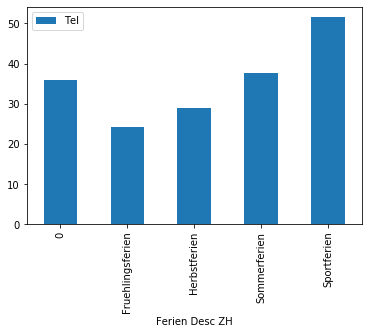

In [275]:
# Average Number of Calls per Holiday Season ZH
df_1[['Ferien Desc ZH','Tel']].groupby('Ferien Desc ZH').mean().plot(kind='bar')

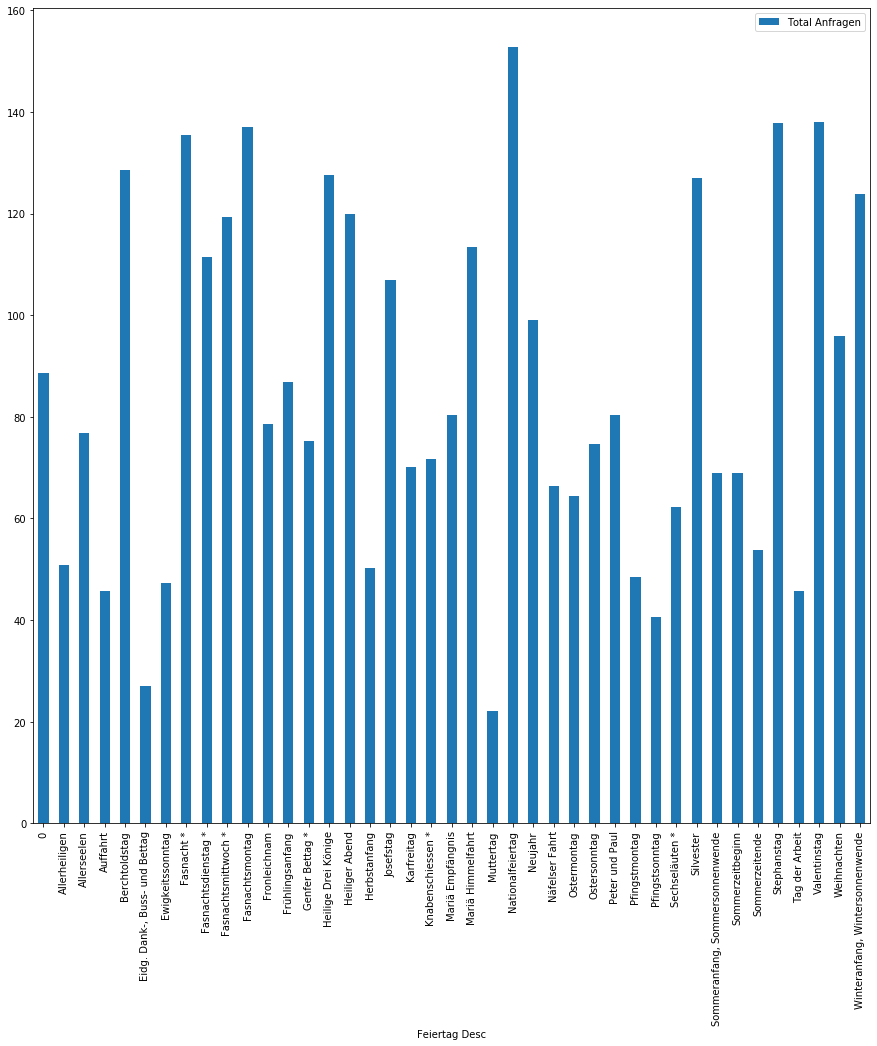

In [276]:
# Total Anfragen Mean per Holiday

width = 15
height = 15
df_1[['Feiertag Desc','Total Anfragen']].groupby('Feiertag Desc').mean().plot(kind='bar',figsize=(width, height))


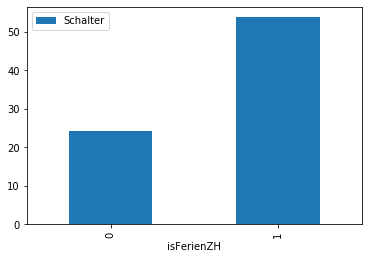

In [277]:
df_1[['isFerienZH','Schalter']].groupby('isFerienZH').mean().plot(kind='bar')

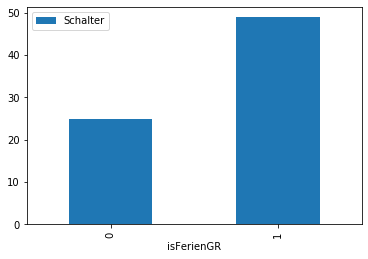

In [278]:
df_1[['isFerienGR','Schalter']].groupby('isFerienGR').mean().plot(kind='bar')

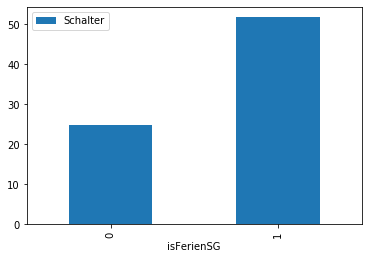

In [279]:
df_1[['isFerienSG','Schalter']].groupby('isFerienSG').mean().plot(kind='bar')

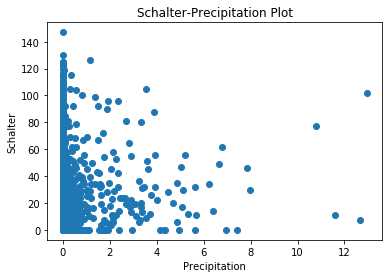

In [280]:
plt.xlabel('Precipitation')
plt.ylabel('Schalter')
plt.title('Schalter-Precipitation Plot')
plt.scatter(df_1['precip_1h_mm_sum'], df_1['Schalter'])

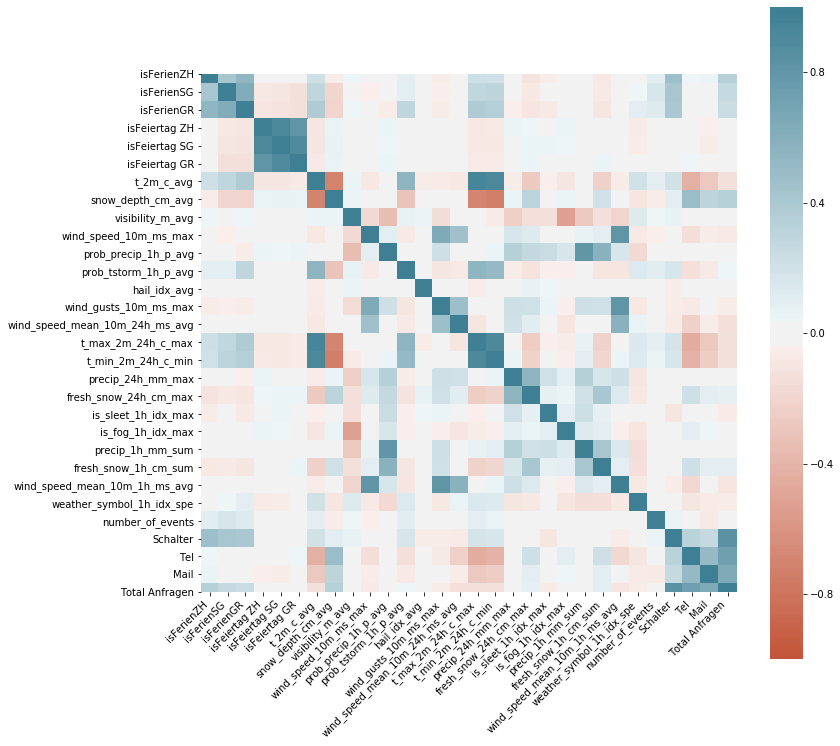

In [281]:
# Create Correlation Matrix
width = 12
height = 12
plt.figure(figsize=(width, height))
corr = df_1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Save cleaned data

In [282]:
df_1.to_csv("../data/data_lenzerheide_clean.csv", sep = ",", index=False)

In [285]:
d = pd.read_csv("../data/data_lenzerheide_clean.csv",)


In [286]:
d_all = d
d = d.drop('Datum', axis=1)
d

,Wochentag,season,isFerienZH,Ferien Desc ZH,isFerienSG,Ferien Desc SG,isFerienGR,Ferien Desc GR,Feiertag Desc,isFeiertag ZH,...,is_fog_1h_idx_max,precip_1h_mm_sum,fresh_snow_1h_cm_sum,wind_speed_mean_10m_1h_ms_avg,weather_symbol_1h_idx_spe,number_of_events,Schalter,Tel,Mail,Total Anfragen
0,Freitag,winter season,0,0,0,0,0,0,Neujahr,1,...,0.0,0.00,0.0,3.8,1.7,0,23.0,65.0,10.0,98.0
1,Samstag,winter season,0,0,0,0,0,0,Berchtoldstag,0,...,1.0,1.70,2.1,3.6,0.0,0,72.0,65.0,18.0,155.0
2,Sonntag,winter season,0,0,0,0,0,0,0,0,...,1.0,0.57,0.5,4.2,0.0,0,38.0,65.0,25.0,128.0
3,Montag,winter season,0,0,0,0,0,0,0,0,...,0.0,0.08,0.0,8.9,0.0,0,65.0,65.0,50.0,180.0
4,Dienstag,winter season,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,5.9,1.1,0,31.0,65.0,40.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Donnerstag,summer season,0,0,0,0,0,0,0,0,...,0.0,0.03,0.0,8.1,0.0,0,15.0,26.0,10.0,25.0
1000,Freitag,summer season,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,6.0,0.7,0,21.0,26.0,10.0,31.0
1001,Samstag,summer season,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,14.2,0.4,0,52.0,26.0,6.0,58.0
1002,Sonntag,summer season,0,0,1,Herbstferien,0,0,0,0,...,0.0,0.00,0.0,9.9,1.4,0,0.0,26.0,7.0,7.0


## XGBoost Model: 1st Attempt 

In [287]:
# Encoding categorical columns I: LabelEncoder 
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Create a boolean mask for categorical columns 
categorical_mask = (d.dtypes == object)  # true → is categorical
# Get list of categorical column names
categorical_columns = d.columns[categorical_mask].tolist()
# Print the head of the categorical columns 
print(d[categorical_columns].head())
# Create LabelEncoder object: le 
le = LabelEncoder()
# Apply LabelEncoder to categorical columns
d[categorical_columns] = d[categorical_columns].apply(lambda x: le.fit_transform(x))
# Print the head of the LabelEncoded categorical columns print(df[categorical_columns].head())


  Wochentag         season Ferien Desc ZH Ferien Desc SG Ferien Desc GR  \
0   Freitag  winter season              0              0              0   
1   Samstag  winter season              0              0              0   
2   Sonntag  winter season              0              0              0   
3    Montag  winter season              0              0              0   
4  Dienstag  winter season              0              0              0   

   Feiertag Desc  
0        Neujahr  
1  Berchtoldstag  
2              0  
3              0  
4              0  


In [288]:
d

,Wochentag,season,isFerienZH,Ferien Desc ZH,isFerienSG,Ferien Desc SG,isFerienGR,Ferien Desc GR,Feiertag Desc,isFeiertag ZH,...,is_fog_1h_idx_max,precip_1h_mm_sum,fresh_snow_1h_cm_sum,wind_speed_mean_10m_1h_ms_avg,weather_symbol_1h_idx_spe,number_of_events,Schalter,Tel,Mail,Total Anfragen
0,2,2,0,0,0,0,0,0,24,1,...,0.0,0.00,0.0,3.8,1.7,0,23.0,65.0,10.0,98.0
1,5,2,0,0,0,0,0,0,4,0,...,1.0,1.70,2.1,3.6,0.0,0,72.0,65.0,18.0,155.0
2,6,2,0,0,0,0,0,0,0,0,...,1.0,0.57,0.5,4.2,0.0,0,38.0,65.0,25.0,128.0
3,4,2,0,0,0,0,0,0,0,0,...,0.0,0.08,0.0,8.9,0.0,0,65.0,65.0,50.0,180.0
4,0,2,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,5.9,1.1,0,31.0,65.0,40.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1,1,0,0,0,0,0,0,0,0,...,0.0,0.03,0.0,8.1,0.0,0,15.0,26.0,10.0,25.0
1000,2,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,6.0,0.7,0,21.0,26.0,10.0,31.0
1001,5,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,14.2,0.4,0,52.0,26.0,6.0,58.0
1002,6,1,0,0,1,2,0,0,0,0,...,0.0,0.00,0.0,9.9,1.4,0,0.0,26.0,7.0,7.0


In [289]:
# One Hot Encoding
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# Create OneHotEncoder: ohe
ohe = OneHotEncoder(categorical_features=categorical_mask, sparse=False)
# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded df_encoded = ohe.fit_transform(df)
# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe print(df_encoded[:5, :])
# Print the shape of the original DataFrame 
d_encoded = ohe.fit_transform(d)
print(d.shape)
# Print the shape of the transformed array 
print(d_encoded.shape)
print(type(d_encoded))
d_encoded

(1004, 36)
(1004, 96)
<class 'numpy.ndarray'>


C:\home\lars\.conda\envs\Hackday_Lenzerheide\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\home\lars\.conda\envs\Hackday_Lenzerheide\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[  0.,   0.,   1., ...,  65.,  10.,  98.],
       [  0.,   0.,   0., ...,  65.,  18., 155.],
       [  0.,   0.,   0., ...,  65.,  25., 128.],
       ...,
       [  0.,   0.,   0., ...,  26.,   6.,  58.],
       [  0.,   0.,   0., ...,  26.,   7.,   7.],
       [  0.,   0.,   0., ...,  26.,  21.,  63.]])

In [290]:
#d_test = d_encoded[-61:]
#d_train_validation = d_encoded[:-61]
#print(d_train_validation.shape)
#print(d_test.shape)
#type(d_train_validation)

In [291]:
X, y = d_encoded[:,:-4],d_encoded[:,-4]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, 
                                                        random_state=122, shuffle=False)
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test =  xgb.DMatrix(data=X_test,label=y_test)
params = {"booster":"gblinear","objective":"reg:linear"}
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=10)

preds = xg_reg.predict(DM_test)

rmse = np.sqrt(mean_squared_error(y_test,preds))

print("RMSE: %f" % (rmse))

[11:57:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 15.246652


### Compare Predictions with Real Values

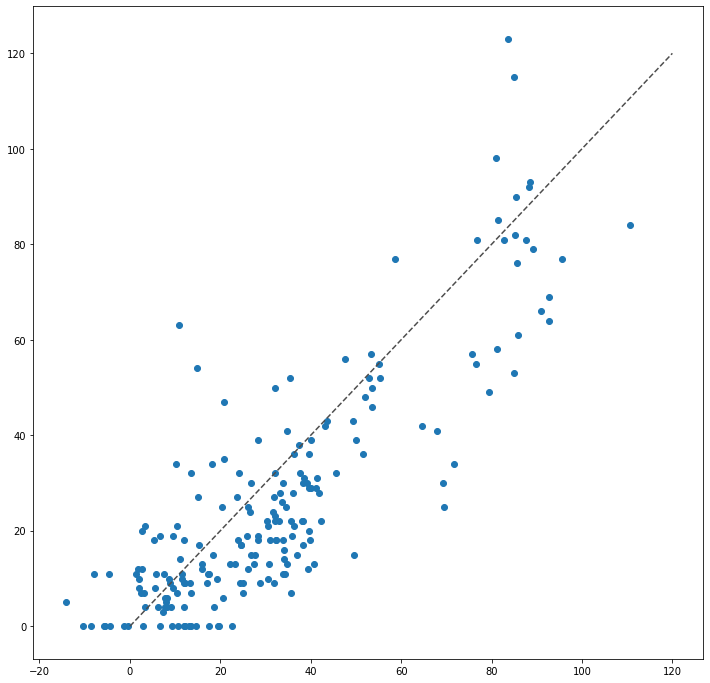

In [293]:
# create scatter plots
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.plot([0, 120], [0, 120], ls="--", c=".3")
plt.scatter(preds,y_test)


Text(0.5, 1.0, 'Schalter Besucher:Prediction vs. Test Value')

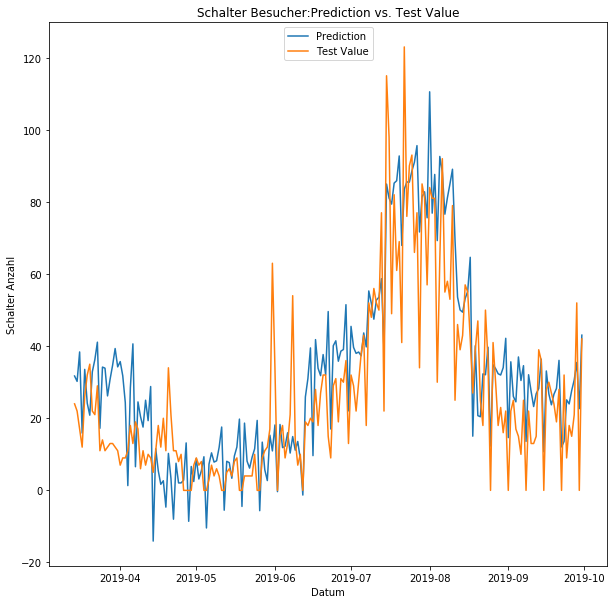

In [294]:
# create time series plot 
width = 10
height = 10
plt.figure(figsize=(width, height))
t = pd.date_range(start='2019-03-14',end='2019-09-30')

plt.plot(t, preds)
plt.plot(t, y_test)

plt.xlabel('Datum')
plt.ylabel('Schalter Anzahl')
plt.legend(('Prediction', 'Test Value'), loc='upper center')
plt.title('Schalter Besucher:Prediction vs. Test Value')


Text(0.5, 1.0, 'Schalter Besucher: Difference Prediction vs. Test Value')

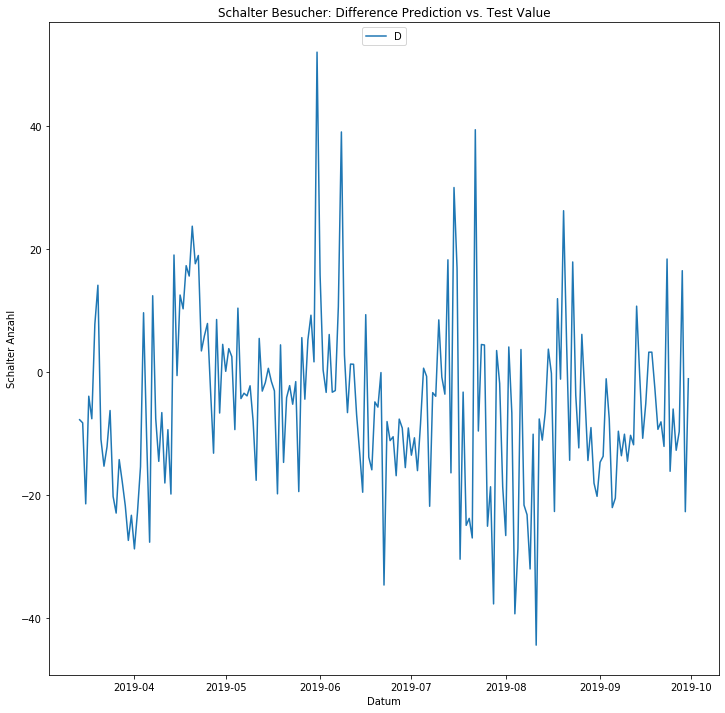

In [295]:
# plot difference between predictions and real values
dif = y_test-preds

width = 12
height = 12
plt.figure(figsize=(width, height))
t = pd.date_range(start='2019-03-14',end='2019-09-30')

plt.plot(t, dif)

plt.xlabel('Datum')
plt.ylabel('Schalter Anzahl')
plt.legend('Difference', loc='upper center')
plt.title('Schalter Besucher: Difference Prediction vs. Test Value')


### Plot Comparison Last Year

In [296]:
d_datetime = d_all
d_datetime['Datum'] = pd.to_datetime(d_all['Datum'],format='%d.%m.%Y')
start_date = pd.to_datetime('14.3.2018',format='%d.%m.%Y')
end_date = pd.to_datetime('30.09.2018',format='%d.%m.%Y')
today = pd.to_datetime('today')
test_data_range = d_datetime[(d_datetime['Datum']>=start_date) & (d_datetime['Datum']<=end_date)]
test_data_range_shifted = test_data_range.shift(-1)
last_year = test_data_range_shifted['Schalter']
rmse = ((last_year - y_test) ** 2).mean() ** .5
rmse

17.212204972053986

Text(0.5, 1.0, 'Front Desk Visiters: Prediction vs. Reality vs. Last Year')

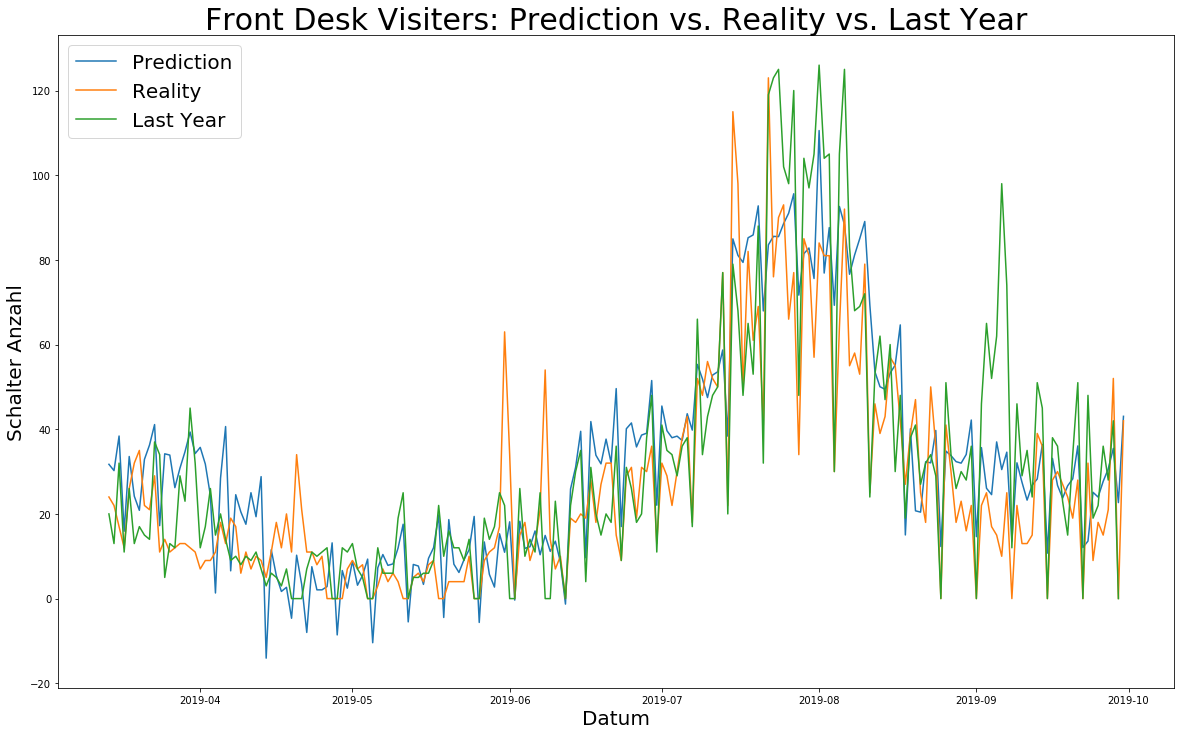

In [297]:
width = 20
height = 12
plt.figure(figsize=(width, height))
t = pd.date_range(start='2019-03-14',end='2019-09-30')

plt.plot(t, preds)
plt.plot(t, y_test)
plt.plot(t,last_year)

plt.xlabel('Datum', fontsize=20)
plt.ylabel('Schalter Anzahl', fontsize=20)
plt.legend(('Prediction', 'Reality','Last Year'), loc='upper left', fontsize=20)
plt.title('Front Desk Visiters: Prediction vs. Reality vs. Last Year', fontsize=30)


### Save monthly CSV Files for Predictions

In [298]:
# Format: 'Datum'; 'Schalter'
date_sep19 = pd.DataFrame(pd.date_range(start='2019-09-01',end='2019-09-30'),columns=['Datum'])
print(date_sep19)
preds_sep19 = pd.DataFrame(preds[-30:],columns=['Schalter'])
print(preds_sep19)
print(len(date_sep19))
print(len(preds_sep19))
df_csv = pd.concat([date_sep19, preds_sep19],axis=1)
df_csv
df_csv.to_csv("../data/model_2019_9.csv", sep = ";", index=False)


        Datum
0  2019-09-01
1  2019-09-02
2  2019-09-03
3  2019-09-04
4  2019-09-05
5  2019-09-06
6  2019-09-07
7  2019-09-08
8  2019-09-09
9  2019-09-10
10 2019-09-11
11 2019-09-12
12 2019-09-13
13 2019-09-14
14 2019-09-15
15 2019-09-16
16 2019-09-17
17 2019-09-18
18 2019-09-19
19 2019-09-20
20 2019-09-21
21 2019-09-22
22 2019-09-23
23 2019-09-24
24 2019-09-25
25 2019-09-26
26 2019-09-27
27 2019-09-28
28 2019-09-29
29 2019-09-30
     Schalter
0   14.630985
1   35.662075
2   26.060135
3   24.554934
4   37.006950
5   30.473454
6   34.586262
7   13.575597
8   32.071957
9   27.464178
10  23.256689
11  26.794369
12  28.249336
13  36.392048
14  10.736670
15  33.119404
16  26.736330
17  23.732328
18  26.653439
19  28.282188
20  36.063560
21  12.057240
22  13.584705
23  25.103935
24  23.978041
25  27.688011
26  30.644581
27  35.482540
28  22.674435
29  43.051109
30
30


## XGBoost Model: 2nd Attempt

In [299]:
# scale variables
# train hyperparameters

In [300]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

xgb_pipeline = Pipeline([("st_scaler",StandardScaler()), 
                        ("xgb_model",xgb.XGBRegressor(max_depth=3))])

gbm_param_grid = {'xgb_model__subsample': np.arange(.05, 1, .05),
                  'xgb_model__max_depth': np.arange(3,20,1),
                  'xgb_model__colsample_bytree': np.arange(.1,1.05,.05) }

randomized_neg_mse = RandomizedSearchCV(estimator=xgb_pipeline, 
                                        param_distributions=gbm_param_grid, n_iter=10,
                                        scoring='neg_mean_squared_error', cv=4)
randomized_neg_mse.fit(X_train, y_train)
print("Best rmse: ", np.sqrt(np.abs(randomized_neg_mse.best_score_)))
print("Best model: ", randomized_neg_mse.best_estimator_)

[11:58:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:09] WARNI

C:\home\lars\.conda\envs\Hackday_Lenzerheide\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [301]:
# RMSE of 2nd attempt XGBoost
preds_2 = randomized_neg_mse.predict(X_test)

rmse_2 = np.sqrt(mean_squared_error(y_test,preds_2))

print("RMSE: %f" % (rmse_2))

RMSE: 14.118876


In [302]:
print(type(X))
print(type(y))
print(type(DM_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'xgboost.core.DMatrix'>


## Random Forest Model: 1st Attempt

In [304]:
d

,Wochentag,season,isFerienZH,Ferien Desc ZH,isFerienSG,Ferien Desc SG,isFerienGR,Ferien Desc GR,Feiertag Desc,isFeiertag ZH,...,is_fog_1h_idx_max,precip_1h_mm_sum,fresh_snow_1h_cm_sum,wind_speed_mean_10m_1h_ms_avg,weather_symbol_1h_idx_spe,number_of_events,Schalter,Tel,Mail,Total Anfragen
0,2,2,0,0,0,0,0,0,24,1,...,0.0,0.00,0.0,3.8,1.7,0,23.0,65.0,10.0,98.0
1,5,2,0,0,0,0,0,0,4,0,...,1.0,1.70,2.1,3.6,0.0,0,72.0,65.0,18.0,155.0
2,6,2,0,0,0,0,0,0,0,0,...,1.0,0.57,0.5,4.2,0.0,0,38.0,65.0,25.0,128.0
3,4,2,0,0,0,0,0,0,0,0,...,0.0,0.08,0.0,8.9,0.0,0,65.0,65.0,50.0,180.0
4,0,2,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,5.9,1.1,0,31.0,65.0,40.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1,1,0,0,0,0,0,0,0,0,...,0.0,0.03,0.0,8.1,0.0,0,15.0,26.0,10.0,25.0
1000,2,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,6.0,0.7,0,21.0,26.0,10.0,31.0
1001,5,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,14.2,0.4,0,52.0,26.0,6.0,58.0
1002,6,1,0,0,1,2,0,0,0,0,...,0.0,0.00,0.0,9.9,1.4,0,0.0,26.0,7.0,7.0


In [305]:
from sklearn.ensemble import RandomForestRegressor

X2, y2 = d.iloc[:,:-4],d.iloc[:,-4]
X_train_2, X_test_2, y_train_2, y_test_2= train_test_split(X2, y2, test_size=0.2, 
                                                        random_state=122, shuffle=False)

regressor = RandomForestRegressor(n_estimators=40, random_state=1)
regressor.fit(X_train_2, y_train_2)
y_pred = regressor.predict(X_test_2)

In [306]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_pred)))

Mean Absolute Error: 10.685572139303483
Mean Squared Error: 200.7450497512438
Root Mean Squared Error: 14.168452623742786


### Show Variable Importance

**Most important variables: **  
- Holiday Season in Canton Zurich
- Snow Depth
- Temperatur 2m über Boden
- Weekday
- HOliday Season in Canton St. Gallen

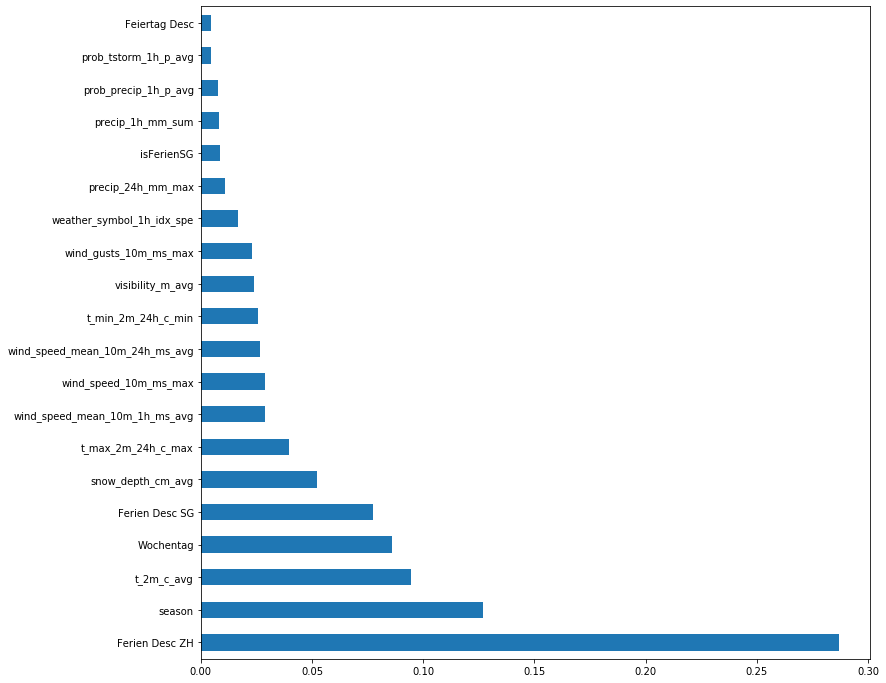

In [307]:
feat_importances = pd.Series(regressor.feature_importances_, index=X2.columns)
width = 12
height = 12
plt.figure(figsize=(width, height))
feat_importances.nlargest(20).plot(kind='barh')

Text(0.5, 1.0, 'Schalter Besucher:Prediction vs. Test Value')

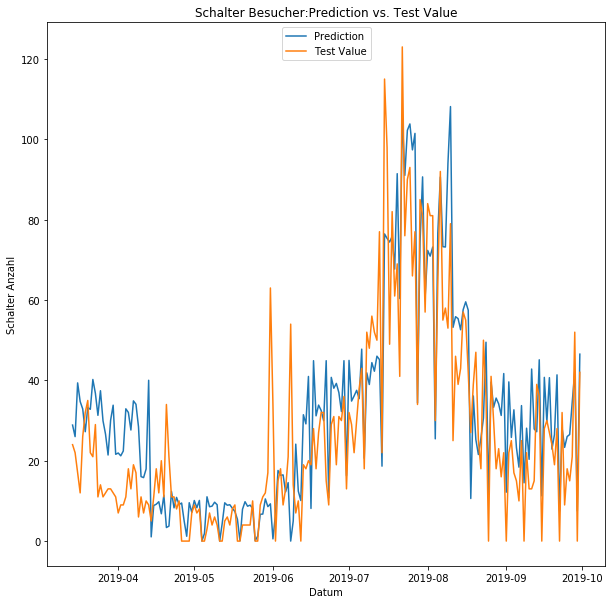

In [308]:
width = 10
height = 10
plt.figure(figsize=(width, height))
t = pd.date_range(start='2019-03-14',end='2019-09-30')

plt.plot(t, y_pred)
plt.plot(t, y_test_2)

plt.xlabel('Datum')
plt.ylabel('Schalter Anzahl')
plt.legend(('Prediction', 'Test Value'), loc='upper center')
plt.title('Schalter Besucher:Prediction vs. Test Value')
